# Predictive Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from math import sqrt

In [2]:
# load prediction dataset
feature_data = pd.read_csv("prediction_data.csv",parse_dates=["start_time"], low_memory=False)
feature_data.head(1)

,start_time,month,day,hour,mean_duration,max_temp,precip,trips,isWeekday
0,2019-01-01,1.0,1.0,0.0,15.736842,15.6,0.0,19,0


## Feature Engineering

### Possible features could be:
1. Month/Season
2. Day
3. Hour
4. Duration
5. Temperature
6. Precipitation
7. Weekday/Weekend

Our target is the number of trips.

We drop the 'start_time' column from our dataset, define our dependent (y) and independent (x) variables and normalize the data using sklearn package. Then, we split the dataset into training and testing sets.

In [3]:
# Normalizing the data
x = feature_data.drop(['trips','start_time'],axis=1)
x = sklearn.preprocessing.normalize(x)
y = feature_data['trips']

In [4]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

## Correlation Analysis

In [5]:
features = ['month', 'day', 'hour', 'mean_duration','max_temp','precip','isWeekday']
target = ['trips']

<AxesSubplot:>

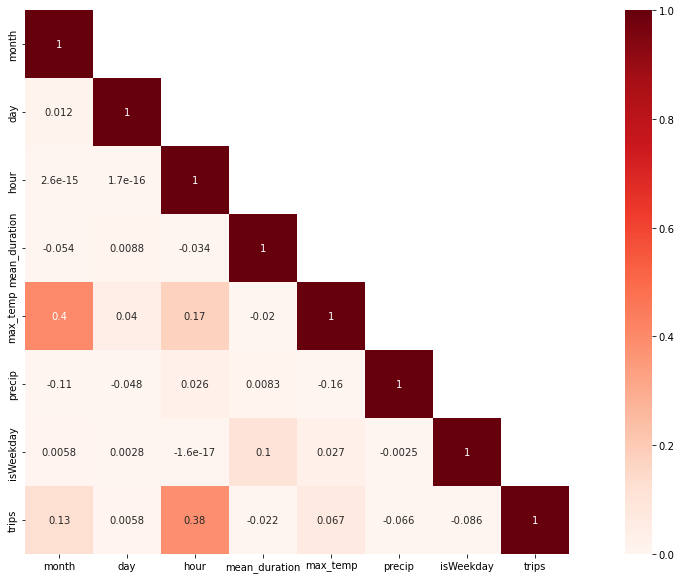

In [6]:
matrix = feature_data[features + target].corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")

• The variables "hour", "month" and "max_temp" seem to be promising features for the bike sharing trip prediction.

## Polynomial Regression

• Regression for one feature: 'hour'

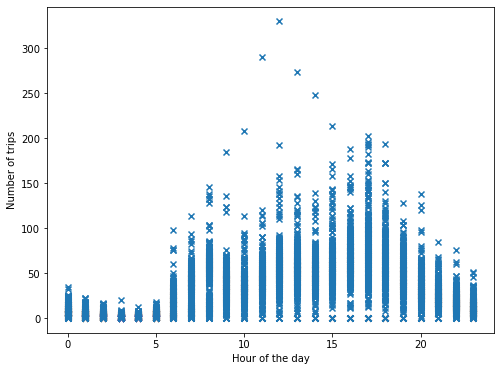

In [7]:
# see if data is linear or non-linear
plt.figure(figsize=(8,6))
plt.scatter(feature_data["hour"], y, marker='x')
plt.xlabel("Hour of the day")
plt.ylabel("Number of trips")
plt.show()

• The relationship between the hours of a day and the number of trips has a non-linear structure which is why we chose a polynomial regression.

In [8]:
def plot_Poly_regression(X,Y,d):
    
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly = LinearRegression()
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data
    x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.scatter(X,Y,marker="x", c='C2')
    ylim = plt.ylim()
    
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of Trips")
    plt.xlim([X.min()-2,X.max()+2])
    plt.ylim(ylim)
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))
    plt.savefig('polynomial regression.png', dpi = 500)
    #print(lin_reg_Poly.coef_)

The R^2 for quadratic curve is:  0.5063156380175526


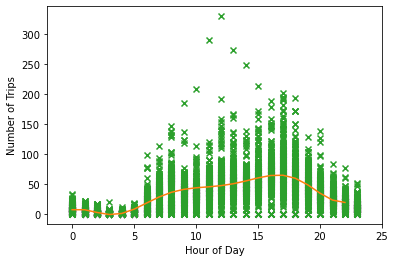

In [9]:
plot_Poly_regression(X =feature_data["hour"].values, Y=y, d = 11) # best with d =11

• highest R^2 is achieved with d=11

Applying polynomial regression on all features:

In [10]:
# create features
polynomial_features = PolynomialFeatures(degree = 3) # best with d=3
x_poly = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)
# create regression
model = LinearRegression()
model.fit(x_poly,y_train)
y_predicted_p = model.predict(x_poly_test)

mse = mean_squared_error(y_test, y_predicted_p)
rmse = sqrt(mse)
r = r2_score(y_test, y_predicted_p)
mae = mean_absolute_error(y_test,y_predicted_p)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 535.4929549895012
Root Mean Squared Error: 23.140720710243688
R score: 0.406246174139807
Mean Absolute Error: 15.724145990891362


See if normalization has an effect:

In [11]:
from sklearn.pipeline import make_pipeline
# create features
polynomial_features = PolynomialFeatures(degree = 3)
x_poly = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)
# create regression
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model.fit(x_poly,y_train)
y_predicted_p = model.predict(x_poly_test)

mse = mean_squared_error(y_test, y_predicted_p)
rmse = sqrt(mse)
r = r2_score(y_test, y_predicted_p)
mae = mean_absolute_error(y_test,y_predicted_p)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 535.4857667279252
Root Mean Squared Error: 23.14056539343681
R score: 0.4062541444740051
Mean Absolute Error: 15.723007364723054


• almost no difference with normalization

## Random Forest Regression

In [12]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100) # Workshop: (n_estimators=10000(default:100),bootstrap=True)
rf.fit(x_train,y_train)
y_predicted_r = rf.predict(x_test)

mse = mean_squared_error(y_test, y_predicted_r)
rmse = sqrt(mse)
r = r2_score(y_test, y_predicted_r)
mae = mean_absolute_error(y_test,y_predicted_r)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 531.5511309741248
Root Mean Squared Error: 23.05539266579784
R score: 0.41061686299423494
Mean Absolute Error: 14.062960426179604


In [13]:
# see if bootstrap has an impact
rf = RandomForestRegressor(n_estimators=100,bootstrap=True) # Workshop: (n_estimators=10000(default:100),bootstrap=True)
rf.fit(x_train,y_train)
y_predicted_r = rf.predict(x_test)

mse = mean_squared_error(y_test, y_predicted_r)
rmse = sqrt(mse)
r = r2_score(y_test, y_predicted_r)
mae = mean_absolute_error(y_test,y_predicted_r)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 524.8952396499238
Root Mean Squared Error: 22.91059230246839
R score: 0.4179969058153986
Mean Absolute Error: 13.920159817351596


• worse with bootstrap

## Feature importance

In [14]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [15]:
# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature hour (0.429345)
2. feature mean_duration (0.151476)
3. feature month (0.140844)
4. feature max_temp (0.114472)
5. feature day (0.087383)
6. feature isWeekday (0.068439)
7. feature precip (0.008040)


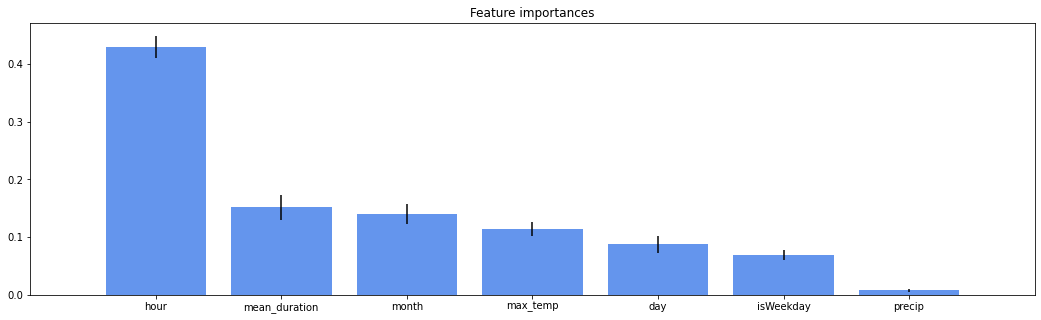

<Figure size 432x288 with 0 Axes>

In [17]:
# Plot the feature importances of the forest
plt.figure(figsize=(18,5))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices], color="cornflowerblue", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), [features[i] for i in indices])
plt.xlim([-1, x_train.shape[1]])
plt.show()
plt.savefig("Random Forest Regression Feature Importance.png")

The result corresponds to the high correlation of the hour variable with the bicycle sharing count in the feature correlation matrix.